# Testing Board 1

## Newly applied rework
 - RCR filter on VBias
 - 10 nF, 10 nF, 1 nF caps on SaFb
 - Increase ADC amplifier filtering
 - Remove U69


## Baseline Test Near Cryo in B33 (load board)


In [1]:
%run Jupyter.py

Connected to GroupRoot at localhost:9099
Created client


In [3]:
print(f'Bias - {group.SaBias.get()}')
print(f'Offset - {group.SaOffset.get()}')
print(f'Feedback - {group.SaFbForce.get()}')

Bias - [0. 0. 0. 0. 0. 0. 0. 0.]
Offset - [0. 0. 0. 0. 0. 0. 0. 0.]
Feedback - [-0.00013674 -0.00013674 -0.00013674 -0.00013674 -0.00013674 -0.00013674
 -0.00013674 -0.00013674]


In [4]:
wc = group.HardwareGroup.ColumnBoard[0].DataPath.WaveformCapture
wcr = group.HardwareGroup.WaveformCaptureReceiver

wc.AllChannels.set(True)
wc.SelectedChannel.set(0)
wc.CaptureWaveform()

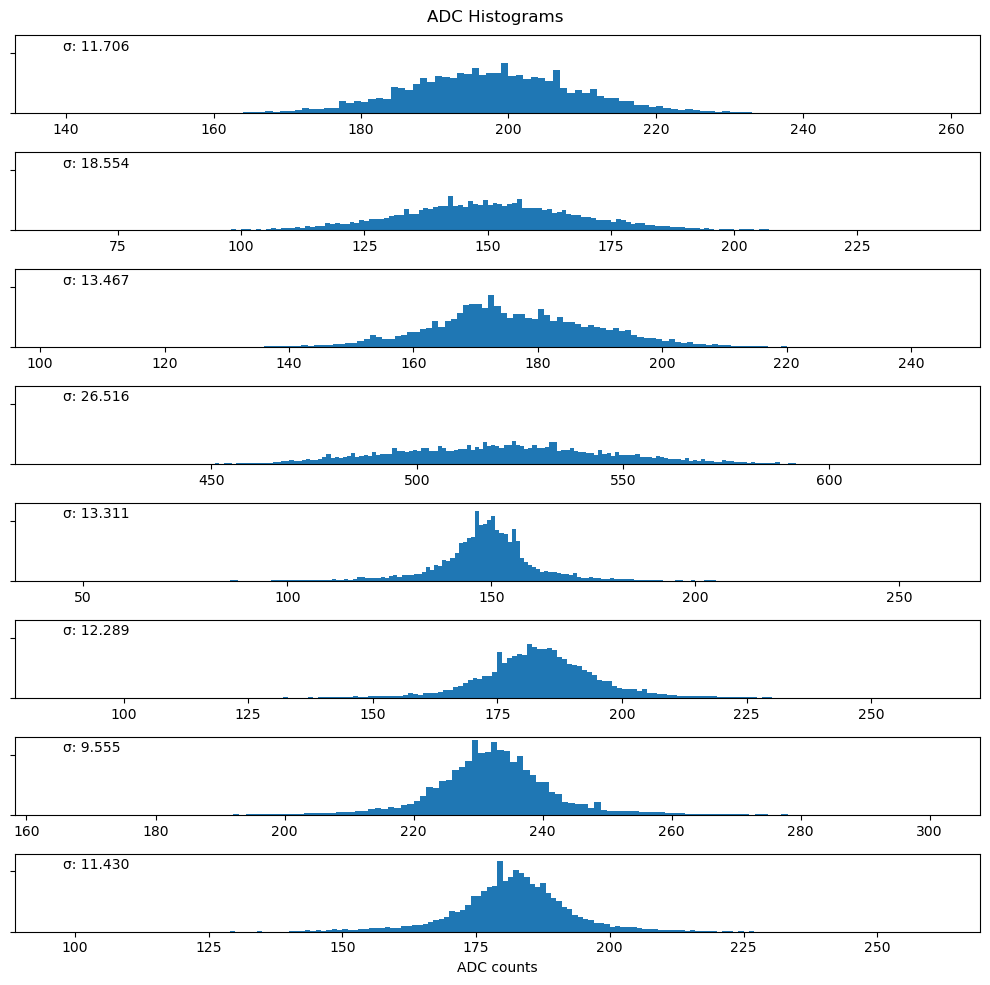

In [5]:
wcr.HistogramPlot.get()

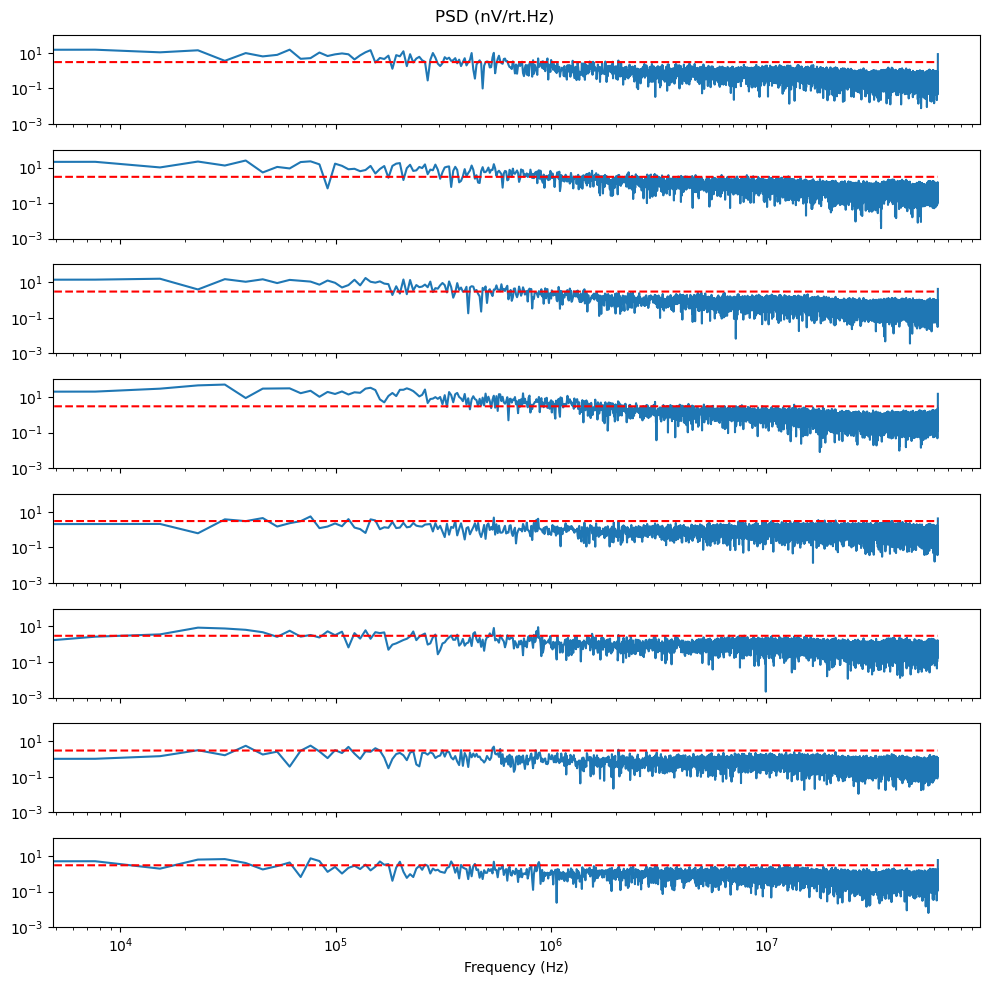

In [6]:
wcr.PeriodogramPlot.get()

In [7]:
group.SaOffsetSweepProcess.SaBiasLow.set(0)
group.SaOffsetSweepProcess.SaBiasHigh.set(2.4999)
group.SaOffsetSweepProcess.SaBiasNumSteps.set(100)
group.SaOffsetSweepProcess.Start()

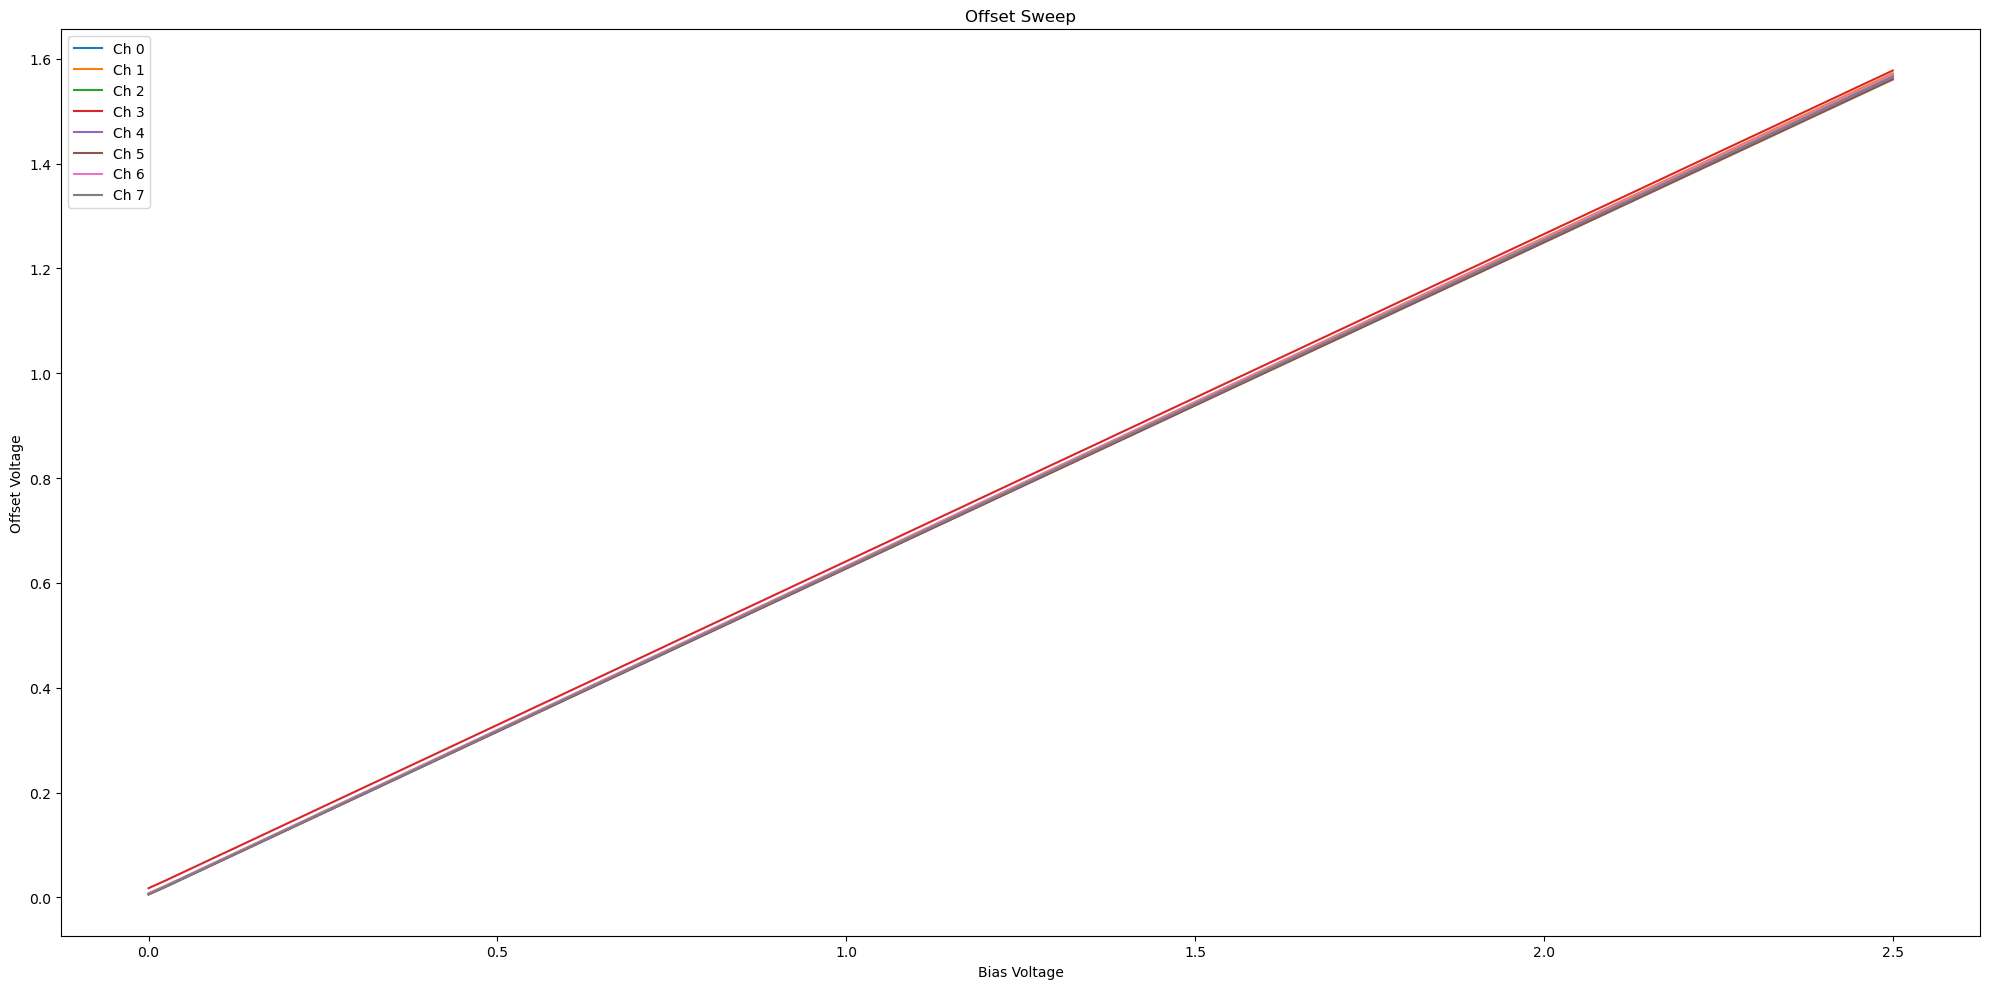

In [8]:
group.SaOffsetSweepProcess.Plot.get()

In [9]:
group.SaTuneProcess.SaBiasLowOffset.set(0.0)
group.SaTuneProcess.SaBiasHighOffset.set(1.0)
group.SaTuneProcess.SaBiasNumSteps.set(5)
group.SaTuneProcess.Start()

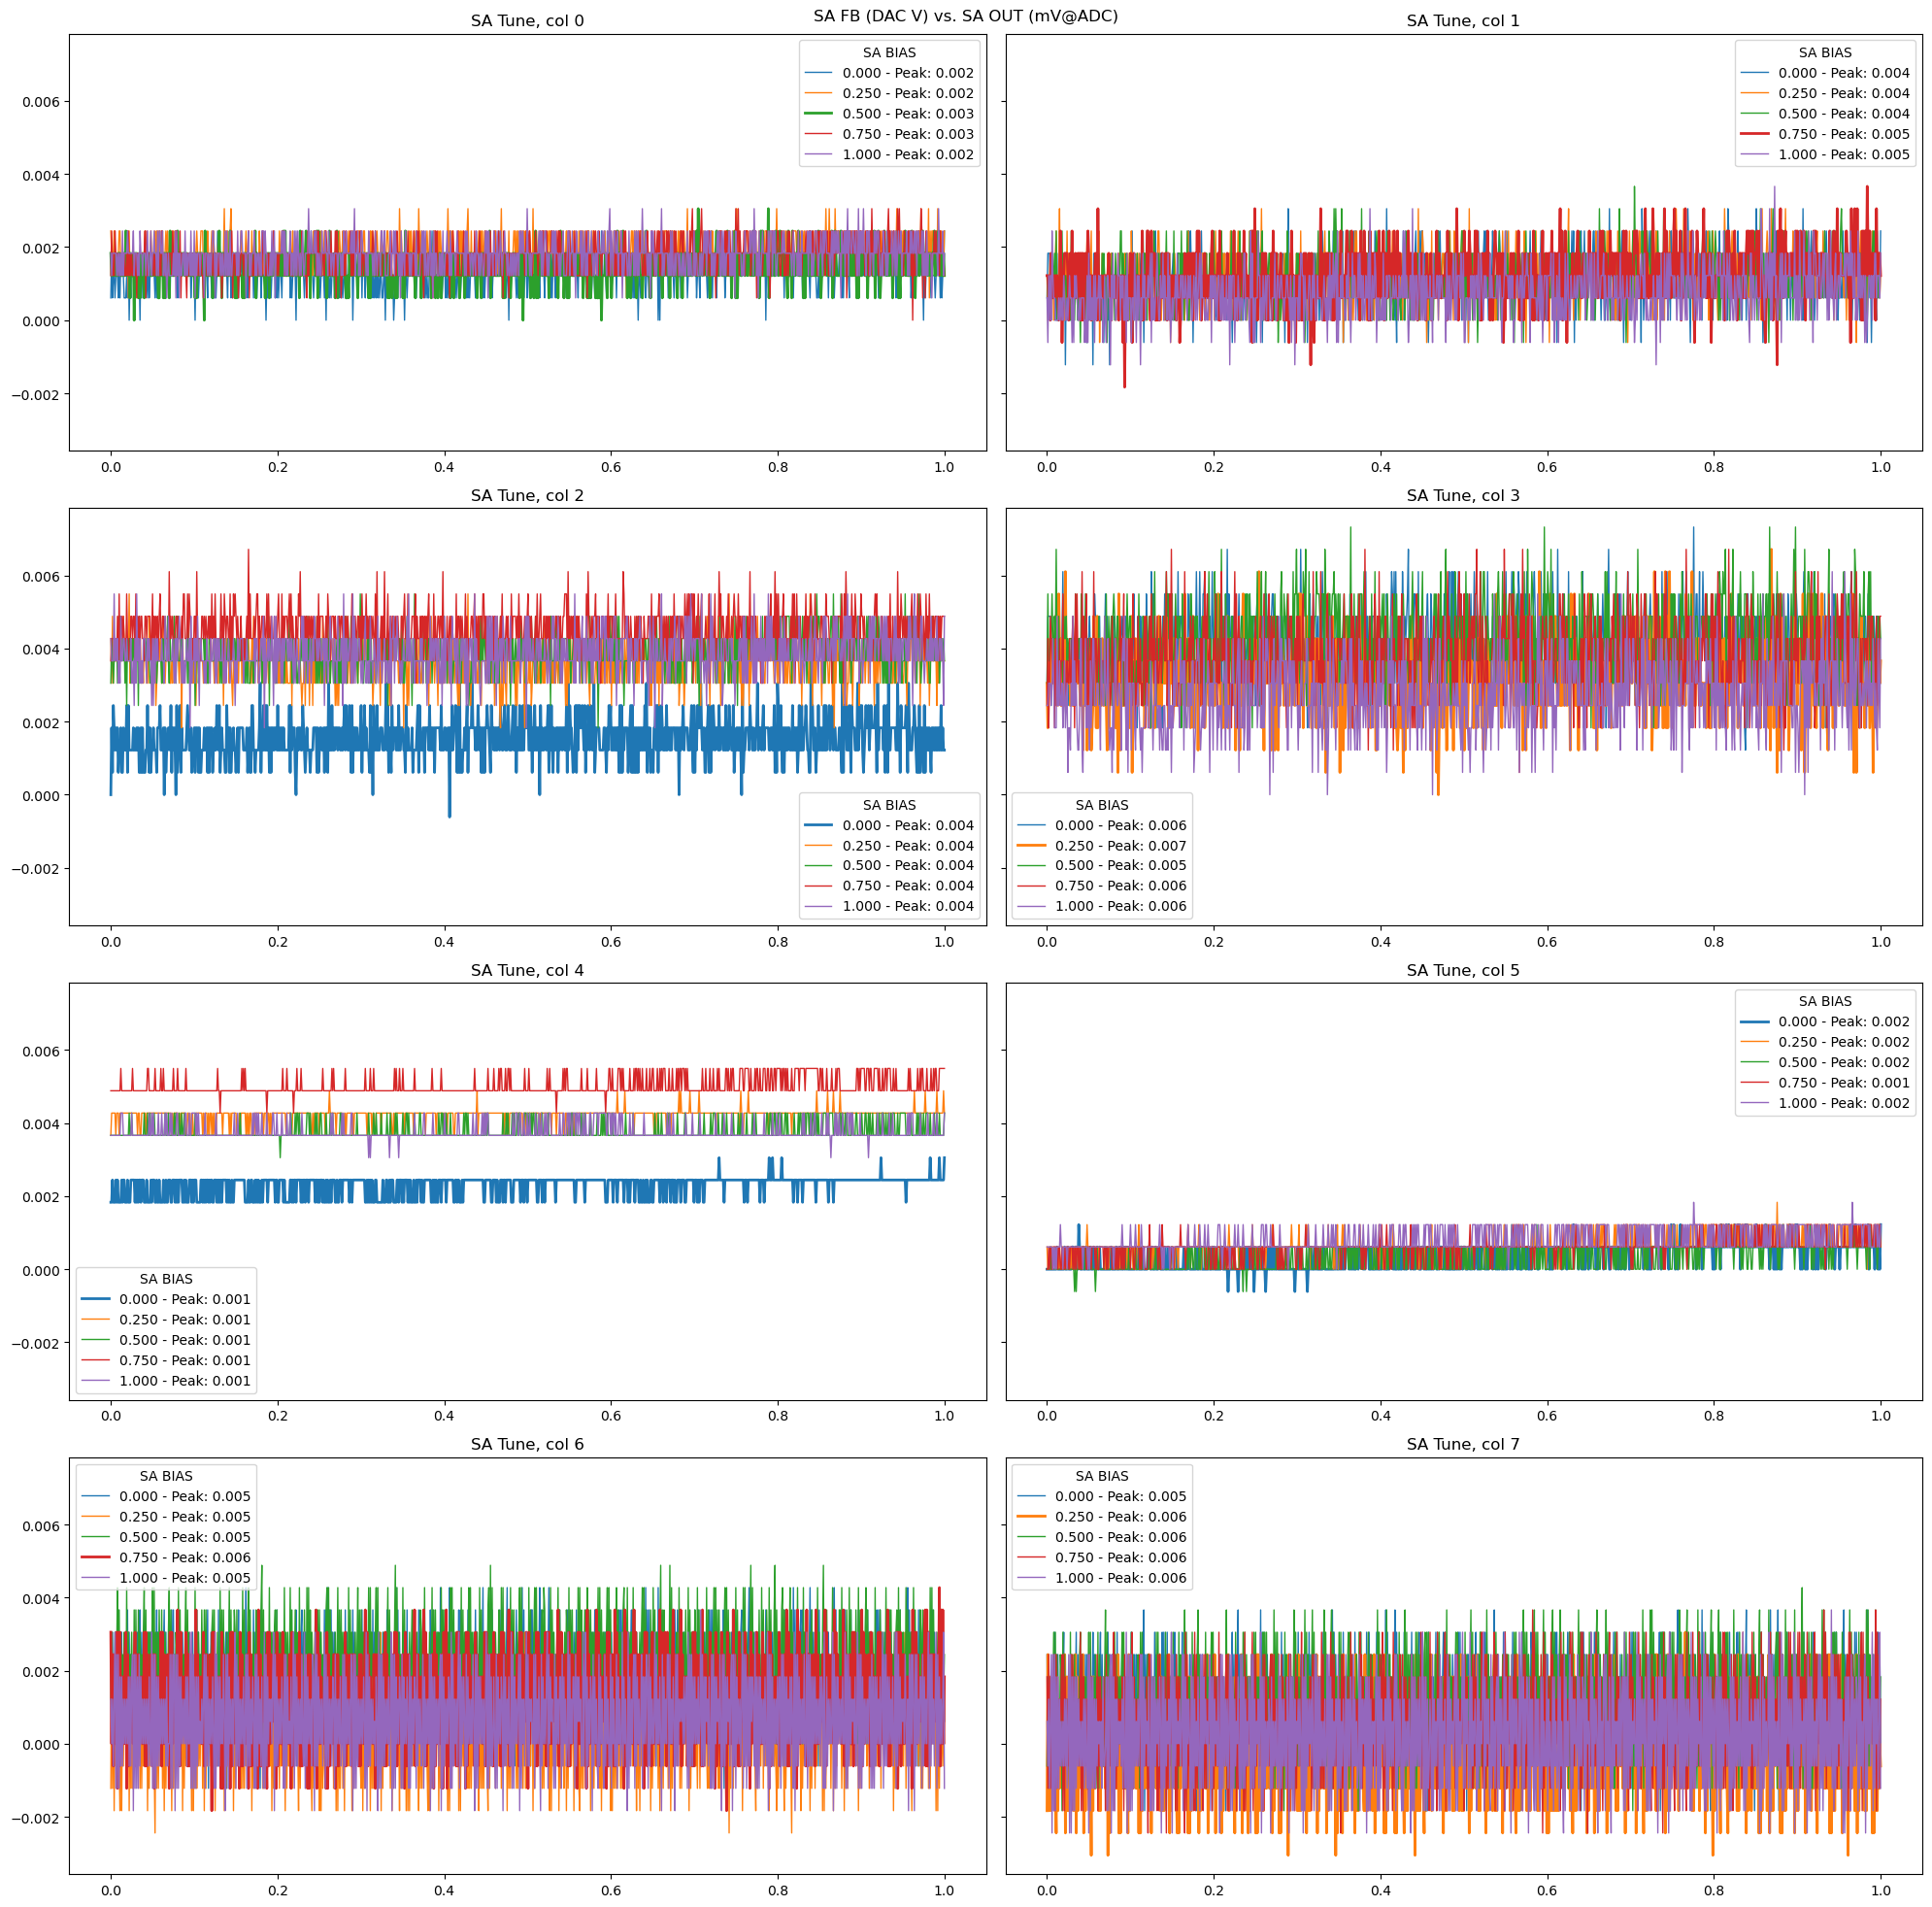

In [10]:
group.SaTuneProcess.PlotMulti.get()